# Libraries

In [1]:
# plot the graphs inline
%matplotlib inline

In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* Separate by \n\n
* Separate by \x0c

In [3]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python
with open ('fullpapers.txt','r',encoding='utf=8') as f:
    data = f.read()

In [4]:
type(data)

str

In [5]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf
# Look into the .split() function, what string are we going to want to split by?
pages = data.split('\x0c')
del(pages[0])
pages[0]

'Zone out no more: Mitigating mind wandering during\ncomputerized reading\nSidney K. D’Mello, Caitlin Mills, Robert Bixler, & Nigel Bosch\nUniversity of Notre Dame\n118 Haggar Hall\nNotre Dame, IN 46556, USA\nsdmello@nd.edu\n\nABSTRACT\nMind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. We propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\nTowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. When mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. After multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in an ex

In [6]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
# Try using a list comprehension to accomplish this task
pages = [page.lower() for page in pages]
pages[-2]

'the parameters to suggest learning is occurring when it may\nnot be. another way to proceed is to consider alternative\nstudent models, which is an active area of educational data\nmining research. perhaps, obtaining semantically degenerate\nparameters from a fit should signal that our students may\nbe learning in more complicated ways than the simple bkt\nmodel can predict, and so we should try to find alternative\nmodels that fit our data better without yielding semantically\ndegenerate parameters. finally, even if our model is semantically degenerate, it does not necessarily make the bkt\nmodel useless. the result of fitting a bkt model is that we\nget the best fit of the data given that we are modeling the\ndata with a two-state hmm (if we disregard local optima).\npresumably, such a model can give us some insights about\nstudent learning even if it is not modeling student mastery.\nso perhaps we can use such semantically degenerate models\nto understand student learning rather th

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. idea
2. idea

In [108]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper
# Using a for loop to iterate over all the pages, try to think of a conditional statement to check whether a page
# represents a new 'paper'. I.e. what is a common aspect of all papers? 
papers = []
current_paper = ' '

# Note: checking for the presence of email addresses started as a great idea but quickly turned ugly
# for clarity and testing, the pattern is separated here as a variable
test_string_1 = 'dkfjskdfjJJDFsdf@bbb'
test_string_2 = 'dkfjskdfjJJDFsdf@dfWE.dfkd'
test_string_3 = '@dfWE.dfkd'
test_string_4 = 'USA\nsdmello@nd.edu\n\n'
print(bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', test_string_1)))
print(bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', test_string_2)))
print(bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', test_string_3)))
print(bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', test_string_4)))

# iterate through the pages and add each paper to the list "papers"
for page in pages:
    if (bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', page)) & (not bool(re.search('wb50@nyu.edu', page)))) :
        papers.append(current_paper)
        current_paper = page
    else:
        current_paper = current_paper + page

papers.append(current_paper)

print(len(papers))
#print(papers[0])
del(papers[0])
print(len(papers))
print(papers[12])

False
True
True
True
19
18
epistemic network analysis and topic modeling for chat
data from collaborative learning environment
zhiqiang cai

brendan eagan

nia m. dowell

the university of memphis
365 innovation drive, suite 410
memphis, tn, usa

university of wisconsin-madison
1025 west johnson street
madison, wi, usa

the university of memphis
365 innovation drive, suite 410
memphis, tn, usa

zcai@memphis.edu

eaganb@gmail.com

niadowell@gmail.com

james w. pennebaker

david w. shaffer

arthur c. graesser

university of texas-austin
116 inner campus dr stop g6000
austin, tx, usa

university of wisconsin-madison
1025 west johnson street
madison, wi, usa

the university of memphis
365 innovation drive, suite 403
memphis, tn, usa

pennebaker@utexas.edu

dws@education.wisc.edu

art.graesser@gmail.com

abstract
this study investigates a possible way to analyze chat data from
collaborative learning environments using epistemic network
analysis and topic modeling. a 300-topic general topic 

In [26]:
# Testing boolean output
not ("\nabstract\n" and "introduction" in pages[0])

False

In [118]:
#pages[94]

In [102]:
bool(re.search(r'@[\w\.-]+\.+[\w\.-]+', pages[94])) | (bool(re.search('wb50@nyu.edu', pages[94])))

True

In [117]:
# Alternatively, just check for the presence of "\nabstract\n"

papers = []
current_paper = pages[0]

for page in pages:
    if not "\nabstract\n" in page:
        current_paper = current_paper + page
    else:
        papers.append(current_paper)
        current_paper = page

papers.append(current_paper)
del(papers[0])

print(len(papers))
#print(papers[0])
print(papers[-1])

18
the misidentified identifiability problem of bayesian
knowledge tracing
shayan doroudi

computer science
department
carnegie mellon university
pittsburgh, pa 15206

shayand@cs.cmu.edu

abstract
in this paper, we investigate two purported problems with
bayesian knowledge tracing (bkt), a popular statistical
model of student learning: identifiability and semantic model
degeneracy. in 2007, beck and chang stated that bkt is
susceptible to an identifiability problem—various models with
different parameters can give rise to the same predictions
about student performance. we show that the problem they
pointed out was not an identifiability problem, and using an
existing result from the identifiability of hidden markov models, we show that under mild conditions on the parameters,
bkt is actually identifiable. in the second part of the paper,
we discuss a problem that has been conflated with identifiability, but which actually does arise when fitting bkt models,
semantic model degeneracy—th

In [119]:
# 7) print how many files you have in the "papers" list:

print(len(papers))

18


In [120]:
# 8) print the content of the first two paper to make sure it worked
# (only print the first 300 characters)
print(papers[0][:300])
print(papers[1][:300])

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processi
measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniques we c


In [125]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"

# The python, but command line way:
newpath = r'./papers' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

!ls

Week 4 - data cleaning - starter code-complete.ipynb
fullpapers.pdf
fullpapers.txt
papers


In [132]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on windows

for i, paper in enumerate (papers):
    with open ('./papers/paper' + str(i) + '.txt','w') as f:
        f.write(paper)

You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [1]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!
import glob
import os
#os.chdir('papers')
paths = glob.glob('paper*.txt')
print(paths, len(paths))

['paper12.txt', 'paper5.txt', 'paper4.txt', 'paper13.txt', 'paper11.txt', 'paper6.txt', 'paper7.txt', 'paper10.txt', 'paper14.txt', 'paper3.txt', 'paper2.txt', 'paper15.txt', 'paper17.txt', 'paper0.txt', 'paper1.txt', 'paper16.txt', 'paper9.txt', 'paper8.txt'] 18


In [2]:
# A human sorting algorithm for ordering paths from 
# https://stackoverflow.com/questions/5967500/how-to-correctly-sort-a-string-with-a-number-inside
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

paths.sort(key=natural_keys)
print(paths)

['paper0.txt', 'paper1.txt', 'paper2.txt', 'paper3.txt', 'paper4.txt', 'paper5.txt', 'paper6.txt', 'paper7.txt', 'paper8.txt', 'paper9.txt', 'paper10.txt', 'paper11.txt', 'paper12.txt', 'paper13.txt', 'paper14.txt', 'paper15.txt', 'paper16.txt', 'paper17.txt']


In [3]:
# 12) iterate through each of the text files and read their contents in the variable below:
# Using a for loop, iterate over all the files in the directory, and add them to the list below
text_list = []

for file in paths:
    with open (file,'r',encoding='utf-8') as f:
        text_list.append(f.read())

print(text_list[-1][:100])

the misidentified identifiability problem of bayesian
knowledge tracing
shayan doroudi

computer sci


In [4]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)
# Using the text_list we create in the cell above, iterate over all words and count their frequencies
# If uncomfortable with dictionaries, google python dict

from collections import defaultdict
import pandas as pd

word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

df = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})

In [5]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe
# Just as we did last week with Pandas, we can do this in only a few lines

print(df.head())

     abs_freq
the      6133
of       3729
and      2805
to       2545
a        2147


What's a problem with the dataframe above? Is there data meaningful?

In [6]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
# the .drop() function could prove useful here
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']

#df.reset_index(inplace=True)
for word in STOPWORDS:
    if (df.index == word).any():
        df.drop(word,inplace=True)

In [7]:
# 16) print the top 20 words of your new dataframe: we can do this with a list slice 
df.head(30)

,abs_freq
data,689
learning,671
student,486
model,454
students,437
=,430
each,358
more,324
educational,323
using,290


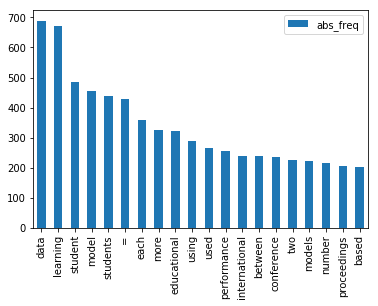

In [9]:
# 17 plot the top 20 results above as a histogram: 
import matplotlib.pyplot as plt

df.head(20).plot(kind='bar')
plt.show()

What can you tell from this historgram? What do EDM researchers seem to care about?

- Data! Model! Learning!

What are improvements you could add to our data cleaning process? Write at least three things:
- remove punctuation
- list of STOPWORDS can be expanded
- phrases needs to be taken into account
- title of the journal should also be discounted (note the many "conference" and "proceedings")

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [10]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"
top_words = df.head(30)
top_words = top_words.reset_index()["index"].values.tolist()
top_words[2]

'student'

In [40]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []

df = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})

for text in text_list:
    dic = {}
    dic['text'] = text
    # iterate through the top words, add counts to the dictionary
    # and append the results to the list above (d)
    for word in top_words:
        dic[word] = text.split().count(word)
    d.append(dic)

# concatenate the list d into a dataframe
df_split = pd.DataFrame.from_dict(d)
print(df_split.columns)
df_split

Index([',', '=', 'based', 'between', 'conference', 'data', 'different', 'each',
       'educational', 'features', 'international', 'knowledge', 'learning',
       'mining', 'model', 'models', 'more', 'number', 'p', 'performance',
       'proceedings', 'results', 'set', 'student', 'students', 'table', 'text',
       'two', 'used', 'using', 'work'],
      dtype='object')


,",",=,based,between,conference,data,different,each,educational,features,...,results,set,student,students,table,text,two,used,using,work
0,0,33,10,6,20,30,6,9,21,14,...,9,6,6,9,7,zone out no more: mitigating mind wandering du...,8,18,7,9
1,2,23,23,10,8,104,15,10,37,0,...,20,10,3,0,6,measuring similarity of educational items usin...,21,34,27,12
2,18,23,12,5,21,23,13,17,10,3,...,7,11,8,12,10,adaptive sequential recommendation for discuss...,9,4,25,3
3,0,27,1,20,19,40,6,25,25,5,...,5,7,4,2,0,analysis of problem-solving behavior in open-e...,15,9,10,30
4,0,4,14,9,10,25,19,24,39,29,...,5,2,45,79,22,the antecedents of and associations with elect...,10,9,5,13
5,38,19,7,9,15,29,10,11,17,0,...,10,3,40,29,9,grade prediction with temporal course-wise inf...,14,0,15,3
6,7,13,26,9,13,14,7,26,10,3,...,3,25,1,10,10,toward the automatic labeling of course questi...,7,26,22,13
7,44,28,3,10,8,46,18,28,10,20,...,3,12,7,1,4,behavior-based latent variable model\nfor lear...,18,7,6,7
8,11,27,17,4,8,122,19,6,18,17,...,7,40,31,5,2,efficient feature embeddings for student class...,12,29,31,5
9,8,7,30,46,10,19,20,23,13,28,...,13,5,23,26,6,predicting short- and long-term vocabulary lea...,17,41,37,3


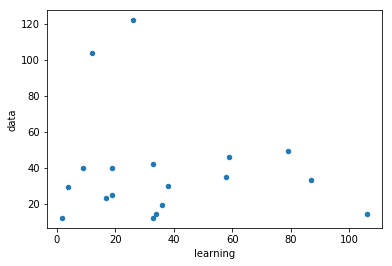

In [16]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?
df_split.plot(x='learning', y='data', kind='scatter')

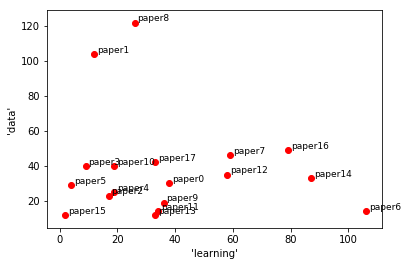

In [43]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
# plt.txt( ) is going to be helpful for us here
indices = ["paper" + str(i) for i in range(0,18)]
#print(indices)
x_coords = df_split.learning
y_coords = df_split.data

for i,index in enumerate(indices):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, color = 'r')
    plt.text(x+1, y+1, index, fontsize=9)
plt.xlabel("'learning'")
plt.ylabel("'data'")
plt.show()

In [51]:
# 22) what are the two extreme papers, 
# i.e., papers with more occurences for each term on each axis?

# paper 8 had the most mention of "data", paper 6 had the most mention of "learning"

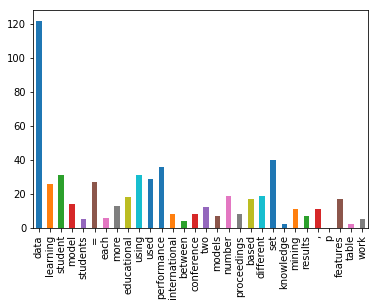

In [72]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe
# .loc is going to be helpful here

df_split.dtypes
df_split.loc[8, top_words].plot.bar()

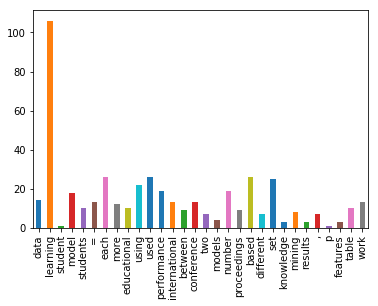

In [73]:
# 24) plot the histogram of the paper that had high counts of "learning"
# .loc is going to be helpful here
df_split.loc[6, top_words].plot.bar()

In [54]:
# 25) what can you observe? 

""" 
The occurrences of the word data in paper 8 and learning in paper 6 are unusually high. In paper 8, many occurrences
of data might actually be under data type. Perhaps paper 8 is more dedicated to data analysis, whereas 6 is to learning
bahavior.
"""

In [74]:
# 26) print the first 1000 characters of each paper. 
print(text_list[8][:1000])
print(text_list[6][:1000])

# Is your interpretation confirmed?

# It's partially confirmed. Paper 8 does appear to focus a lot on data, and 6 more on learning.

efficient feature embeddings for student classification
with variational auto-encoders
severin klingler

dept. of computer science
eth zurich, switzerland

kseverin@inf.ethz.ch

rafael wampfler

dept. of computer science
eth zurich, switzerland

wrafael@inf.ethz.ch

barbara solenthaler

dept. of computer science
eth zurich, switzerland

sobarbar@inf.ethz.ch

abstract
gathering labeled data in educational data mining (edm)
is a time and cost intensive task. however, the amount
of available training data directly influences the quality of
predictive models. unlabeled data, on the other hand, is
readily available in high volumes from intelligent tutoring
systems and massive open online courses. in this paper, we
present a semi-supervised classification pipeline that makes
effective use of this unlabeled data to significantly improve
model quality. we employ deep variational auto-encoders
to learn efficient feature embeddings that improve the performance for standard classifiers by up to 2

# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [75]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below

paper0 = text_list[0]
print(paper0)

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 part

In [82]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

abstract0 = re.findall(r'abstract(.*?)introduction', paper0, re.DOTALL)
print(abstract0[0])


mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 participants. the key
dependent variable was performance on a post-reading
comprehension assessment. our results suggest that the
technology was successful in correcting comprehension deficits
attributed to mind wandering (d = .47

In [81]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function
print(paper0[paper0.index('abstract'):paper0.index('introduction')])

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 participants. the key
dependent variable was performance on a post-reading
comprehension assessment. our results suggest that the
technology was successful in correcting comprehension deficits
attributed to mind wandering 

In [84]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string
df_split["abstract"] = ""
df_split.head()

,",",=,based,between,conference,data,different,each,educational,features,...,set,student,students,table,text,two,used,using,work,abstract
0,0,33,10,6,20,30,6,9,21,14,...,6,6,9,7,zone out no more: mitigating mind wandering du...,8,18,7,9,
1,2,23,23,10,8,104,15,10,37,0,...,10,3,0,6,measuring similarity of educational items usin...,21,34,27,12,
2,18,23,12,5,21,23,13,17,10,3,...,11,8,12,10,adaptive sequential recommendation for discuss...,9,4,25,3,
3,0,27,1,20,19,40,6,25,25,5,...,7,4,2,0,analysis of problem-solving behavior in open-e...,15,9,10,30,
4,0,4,14,9,10,25,19,24,39,29,...,2,45,79,22,the antecedents of and associations with elect...,10,9,5,13,


In [89]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for i, row in df_split.iterrows():
    text_num = text_list[i]
    df_split.loc[i,"abstract"] = re.findall(r'abstract\n(.*?)introduction', text_num, re.DOTALL)[0]

df_split


,",",=,based,between,conference,data,different,each,educational,features,...,set,student,students,table,text,two,used,using,work,abstract
0,0,33,10,6,20,30,6,9,21,14,...,6,6,9,7,zone out no more: mitigating mind wandering du...,8,18,7,9,"mind wandering, defined as shifts in attention..."
1,2,23,23,10,8,104,15,10,37,0,...,10,3,0,6,measuring similarity of educational items usin...,21,34,27,12,educational systems typically contain a large ...
2,18,23,12,5,21,23,13,17,10,3,...,11,8,12,10,adaptive sequential recommendation for discuss...,9,4,25,3,\nmassive open online courses (moocs) have dem...
3,0,27,1,20,19,40,6,25,25,5,...,7,4,2,0,analysis of problem-solving behavior in open-e...,15,9,10,30,"\nproblem-solving skills in creative, open-end..."
4,0,4,14,9,10,25,19,24,39,29,...,2,45,79,22,the antecedents of and associations with elect...,10,9,5,13,replayability has long been touted as a benefi...
5,38,19,7,9,15,29,10,11,17,0,...,3,40,29,9,grade prediction with temporal course-wise inf...,14,0,15,3,there is a critical need to develop new educat...
6,7,13,26,9,13,14,7,26,10,3,...,25,1,10,10,toward the automatic labeling of course questi...,7,26,22,13,expertise in a domain of knowledge is characte...
7,44,28,3,10,8,46,18,28,10,20,...,12,7,1,4,behavior-based latent variable model\nfor lear...,18,7,6,7,we propose a new model for learning that relat...
8,11,27,17,4,8,122,19,6,18,17,...,40,31,5,2,efficient feature embeddings for student class...,12,29,31,5,gathering labeled data in educational data min...
9,8,7,30,46,10,19,20,23,13,28,...,5,23,26,6,predicting short- and long-term vocabulary lea...,17,41,37,3,\nwe show how the novel use of a semantic repr...


In [90]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)

print(df_split.abstract)

0     mind wandering, defined as shifts in attention...
1     educational systems typically contain a large ...
2     \nmassive open online courses (moocs) have dem...
3     \nproblem-solving skills in creative, open-end...
4     replayability has long been touted as a benefi...
5     there is a critical need to develop new educat...
6     expertise in a domain of knowledge is characte...
7     we propose a new model for learning that relat...
8     gathering labeled data in educational data min...
9     \nwe show how the novel use of a semantic repr...
10    we investigate generalizability of face-based ...
11    we present results of a randomized controlled ...
12    this study investigates a possible way to anal...
13    in this study, we applied decision trees (dt) ...
14    in this paper, we investigate the relationship...
15    adaptive learning technologies hold great prom...
16    research in educational data mining could bene...
17    in this paper, we investigate two purporte

In [91]:
# 32) clean the abstract column using the "apply" function with a lambda
# Hint: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

df_split.abstract.apply(lambda x : x.replace("\n"," "))

0     mind wandering, defined as shifts in attention...
1     educational systems typically contain a large ...
2      massive open online courses (moocs) have demo...
3      problem-solving skills in creative, open-ende...
4     replayability has long been touted as a benefi...
5     there is a critical need to develop new educat...
6     expertise in a domain of knowledge is characte...
7     we propose a new model for learning that relat...
8     gathering labeled data in educational data min...
9      we show how the novel use of a semantic repre...
10    we investigate generalizability of face-based ...
11    we present results of a randomized controlled ...
12    this study investigates a possible way to anal...
13    in this study, we applied decision trees (dt) ...
14    in this paper, we investigate the relationship...
15    adaptive learning technologies hold great prom...
16    research in educational data mining could bene...
17    in this paper, we investigate two purporte

## Comparing documents using TF-IDF

In [94]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=1)

tfidf = vect.fit_transform([text_list[0],text_list[1]])

print ((tfidf * tfidf.T).A)

[[1.         0.73305794]
 [0.73305794 1.        ]]
  (0, 2563)	0.004300914794131196
  (0, 1674)	0.015053201779459187
  (0, 1612)	0.01530068149440035
  (0, 1558)	0.022951022241600526
  (0, 1544)	0.006451372191196794
  (0, 1532)	0.1927885868294444
  (0, 2500)	0.25590443025080617
  (0, 882)	0.06451372191196794
  (0, 635)	0.015053201779459187
  (0, 1906)	0.09677058286795191
  (0, 2114)	0.002150457397065598
  (0, 1511)	0.03225686095598397
  (0, 527)	0.002150457397065598
  (0, 1530)	0.01075228698532799
  (0, 2018)	0.002150457397065598
  (0, 485)	0.008601829588262392
  (0, 1609)	0.002150457397065598
  (0, 496)	0.008601829588262392
  (0, 2425)	0.0045902044483201055
  (0, 1641)	0.3519156743712081
  (0, 1620)	0.004300914794131196
  (0, 746)	0.004300914794131196
  (0, 30)	0.002150457397065598
  (0, 1158)	0.002150457397065598
  (0, 1160)	0.004300914794131196
  :	:
  (1, 1065)	0.002307095515444551
  (1, 1484)	0.002307095515444551
  (1, 2041)	0.002307095515444551
  (1, 1375)	0.002307095515444551
  (

34) What can you observe?
- text 0 and 1 are quite similar (1 means completely the same, then 0.733 should be a fairly high score)

In [93]:
# 35) repeat the same procedure with the entire papers
# Use the same logic as the previous cell, but use the text_list variable that we defined previously

tfidf_all = vect.fit_transform(text_list)

print ((tfidf_all * tfidf_all.T).A)

[[1.         0.58527036 0.55484112 0.57085369 0.48737318 0.53651013
  0.65405778 0.63859791 0.57230488 0.57410992 0.61725357 0.51247474
  0.60846734 0.5899608  0.50470087 0.59180567 0.57508815 0.57617114]
 [0.58527036 1.         0.60206027 0.58951182 0.4641505  0.56535937
  0.6423498  0.64549081 0.60376706 0.59827424 0.52626747 0.48327898
  0.5964596  0.57212393 0.45719749 0.57861243 0.58367085 0.59296514]
 [0.55484112 0.60206027 1.         0.54781033 0.45336127 0.59414405
  0.62626973 0.60750337 0.55697996 0.54960645 0.50232787 0.45473266
  0.57419331 0.58042489 0.43554246 0.55668386 0.53928969 0.57656683]
 [0.57085369 0.58951182 0.54781033 1.         0.4702688  0.52246337
  0.63001856 0.61132478 0.55996539 0.54724684 0.51963395 0.47568404
  0.58851914 0.58432969 0.43919359 0.55435697 0.5524181  0.5678836 ]
 [0.48737318 0.4641505  0.45336127 0.4702688  1.         0.4521462
  0.51375558 0.50481305 0.46509365 0.487427   0.43601037 0.44843418
  0.51565192 0.4978618  0.38776686 0.46703564

In [96]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 

print(df_split.abstract.loc[6])
print(df_split.abstract.loc[7])

print(text_list[6][:1000])
print(text_list[7][:1000])

expertise in a domain of knowledge is characterized by a greater
fluency for solving problems within that domain and a greater
facility for transferring the structure of that knowledge to other
domains. deliberate practice and the feedback that takes place
during practice activities serve as gateways for developing domain
expertise. however, there is a difficulty in consistently aligning
feedback about a learner’s practice performance with the intended
learning outcomes of those activities – especially in situations
where the person providing feedback is unfamiliar with the
intention of those activities. to address this problem, we propose
an intelligent model to automatically label opportunities for
practice (assessment questions) according to the learning outcomes
intended by the course designers. as a proof of concept, we used a
reduced version of bloom’s taxonomy to define the intended
learning outcomes. using a factorial design, we employed term
frequency-inverse document frequenc

In [66]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references